# Thao t√°c h√¨nh ·∫£nh c∆° b·∫£n

Trong s·ªï tay n√†y, m√¨nh s·∫Ω tr√¨nh b√†y c√°ch th·ª±c hi·ªán chuy·ªÉn ƒë·ªïi h√¨nh ·∫£nh bao g·ªìm:
* Truy c·∫≠p v√† thao t√°c pixel h√¨nh ·∫£nh
* Thay ƒë·ªïi k√≠ch th∆∞·ªõc h√¨nh ·∫£nh
* C·∫Øt
* L·∫≠t

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

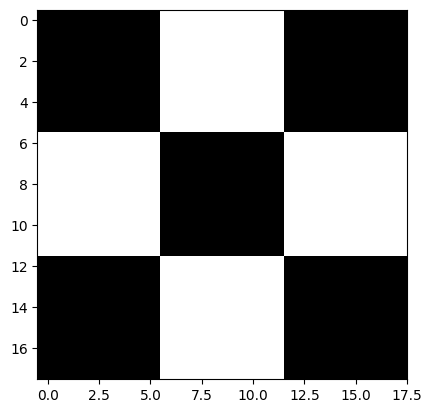

In [15]:
# ƒê·ªçc h√¨nh ·∫£nh theo thang ƒë·ªô x√°m.
cb_img = cv2.imread("image/checkerboard_18x18.png", 0)

# ƒê·∫∑t b·∫£n ƒë·ªì m√†u theo thang ƒë·ªô x√°m ƒë·ªÉ hi·ªÉn th·ªã ƒë√∫ng.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

## Truy c·∫≠p t·ª´ng ƒëi·ªÉm ·∫£nh ri√™ng l·∫ª

Ch√∫ng ta h√£y xem c√°ch truy c·∫≠p m·ªôt ƒëi·ªÉm ·∫£nh trong h√¨nh ·∫£nh.

ƒê·ªÉ truy c·∫≠p b·∫•t k·ª≥ ƒëi·ªÉm ·∫£nh n√†o trong ma tr·∫≠n numpy, b·∫°n ph·∫£i s·ª≠ d·ª•ng k√Ω hi·ªáu ma tr·∫≠n nh∆∞ matrix[r,c], trong ƒë√≥ r l√† s·ªë h√†ng v√† c l√† s·ªë c·ªôt. Ngo√†i ra, l∆∞u √Ω r·∫±ng ma tr·∫≠n ƒë∆∞·ª£c l·∫≠p ch·ªâ m·ª•c 0.

V√≠ d·ª•, n·∫øu b·∫°n mu·ªën truy c·∫≠p ƒëi·ªÉm ·∫£nh ƒë·∫ßu ti√™n, b·∫°n c·∫ßn ch·ªâ ƒë·ªãnh matrix[0,0]. Ch√∫ng ta h√£y xem m·ªôt s·ªë v√≠ d·ª•. Ch√∫ng ta s·∫Ω in m·ªôt ƒëi·ªÉm ·∫£nh m√†u ƒëen t·ª´ tr√™n c√πng b√™n tr√°i v√† m·ªôt ƒëi·ªÉm ·∫£nh m√†u tr·∫Øng t·ª´ tr√™n c√πng ·ªü gi·ªØa.

In [16]:
# in ƒëi·ªÉm ·∫£nh ƒë·∫ßu ti√™n c·ªßa h·ªôp ƒëen ƒë·∫ßu ti√™n
print(cb_img[0, 0])
# in ƒëi·ªÉm ·∫£nh m√†u tr·∫Øng ƒë·∫ßu ti√™n b√™n ph·∫£i h·ªôp ƒëen ƒë·∫ßu ti√™n
print(cb_img[0, 6])

0
255


## S·ª≠a ƒë·ªïi ƒëi·ªÉm ·∫£nh c·ªßa h√¨nh ·∫£nh

Ch√∫ng ta c√≥ th·ªÉ s·ª≠a ƒë·ªïi gi√° tr·ªã c∆∞·ªùng ƒë·ªô c·ªßa ƒëi·ªÉm ·∫£nh theo c√πng c√°ch nh∆∞ m√¥ t·∫£ ·ªü tr√™n.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

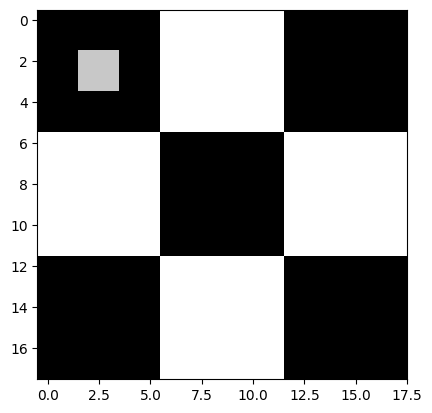

In [17]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# Gi·ªëng nh∆∞ tr√™n
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap="gray")
print(cb_img_copy)

## C·∫Øt ·∫£nh

C·∫Øt ·∫£nh ch·ªâ ƒë∆°n gi·∫£n b·∫±ng c√°ch ch·ªçn m·ªôt v√πng (pixel) c·ª• th·ªÉ c·ªßa ·∫£nh.

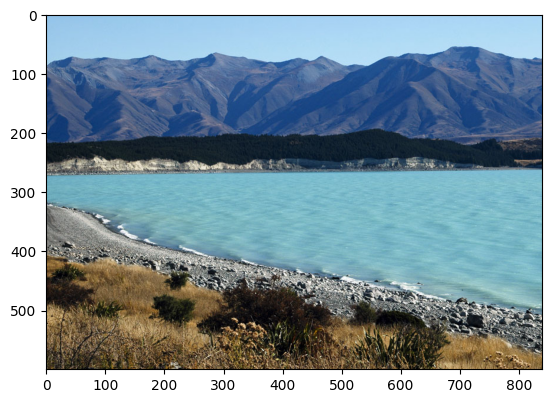

In [18]:
img_NZ_bgr = cv2.imread("image/New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.imshow(img_NZ_rgb)

### C·∫Øt b·ªè ph·∫ßn gi·ªØa c·ªßa h√¨nh ·∫£nh

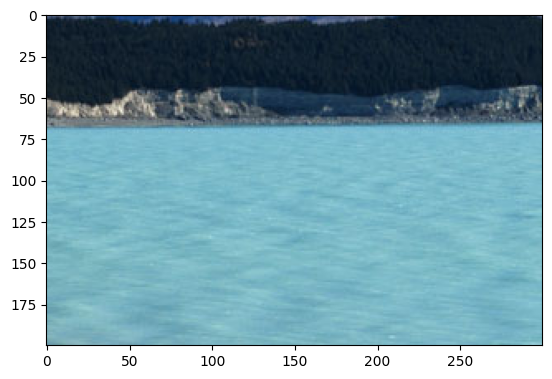

In [19]:
cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

## Thay ƒë·ªïi k√≠ch th∆∞·ªõc h√¨nh ·∫£nh


H√†m **`resize`** thay ƒë·ªïi k√≠ch th∆∞·ªõc h√¨nh ·∫£nh `src` xu·ªëng ho·∫∑c l√™n ƒë·∫øn k√≠ch th∆∞·ªõc ƒë√£ ch·ªâ ƒë·ªãnh. K√≠ch th∆∞·ªõc v√† ki·ªÉu ƒë∆∞·ª£c l·∫•y t·ª´ `src`,`dsize`,`fx` v√† `fy`.

### C√∫ ph√°p h√†m

``` python
dst = resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
```

`dst`: h√¨nh ·∫£nh ƒë·∫ßu ra; c√≥ k√≠ch th∆∞·ªõc dsize (khi kh√°c kh√¥ng) ho·∫∑c k√≠ch th∆∞·ªõc ƒë∆∞·ª£c t√≠nh t·ª´ src.size(), fx v√† fy; ki·ªÉu dst gi·ªëng v·ªõi src.

H√†m c√≥ **2 ƒë·ªëi s·ªë b·∫Øt bu·ªôc**:

1. `src`: h√¨nh ·∫£nh ƒë·∫ßu v√†o

2. `dsize`: k√≠ch th∆∞·ªõc h√¨nh ·∫£nh ƒë·∫ßu ra

C√°c ƒë·ªëi s·ªë t√πy ch·ªçn th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng bao g·ªìm:

1. `fx`: H·ªá s·ªë t·ª∑ l·ªá d·ªçc theo tr·ª•c ngang; khi b·∫±ng 0, n√≥ ƒë∆∞·ª£c t√≠nh l√† (ùöçùöòùöûùöãùöïùöé)ùöçùöúùöíùö£ùöé.ùö†ùöíùöçùöùùöë/ùöúùöõùöå.ùöåùöòùöïùöú

2. `fy`: H·ªá s·ªë t·ª∑ l·ªá d·ªçc theo tr·ª•c d·ªçc; khi b·∫±ng 0, n√≥ ƒë∆∞·ª£c t√≠nh l√† (ùöçùöòùöûùöãùöïùöé)ùöçùöúùöíùö£ùöé.ùöëùöéùöíùöêùöëùöù/ùöúùöõùöå.ùöõùöòùö†ùöú

H√¨nh ·∫£nh ƒë·∫ßu ra c√≥ k√≠ch th∆∞·ªõc `dsize` (khi n√≥ kh√°c kh√¥ng) ho·∫∑c k√≠ch th∆∞·ªõc ƒë∆∞·ª£c t√≠nh t·ª´ `src.size()`, `fx` v√† `fy`; ki·ªÉu dst gi·ªëng nh∆∞ c·ªßa src.

### T√†i li·ªáu OpenCV

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Li√™n k·∫øt t√†i li·ªáu</a>

### Ph∆∞∆°ng ph√°p 1: Ch·ªâ ƒë·ªãnh H·ªá s·ªë t·ª∑ l·ªá b·∫±ng c√°ch s·ª≠ d·ª•ng fx v√† fy

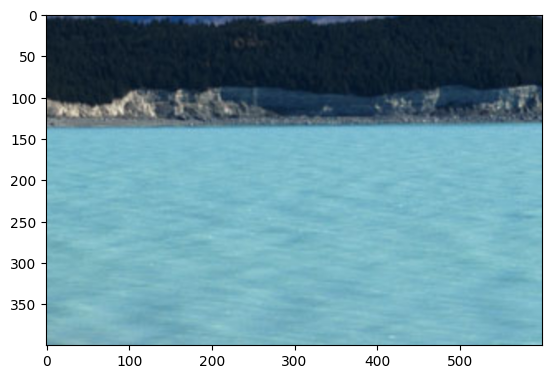

In [20]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

### Ph∆∞∆°ng ph√°p 2: Ch·ªâ ƒë·ªãnh k√≠ch th∆∞·ªõc ch√≠nh x√°c c·ªßa h√¨nh ·∫£nh ƒë·∫ßu ra

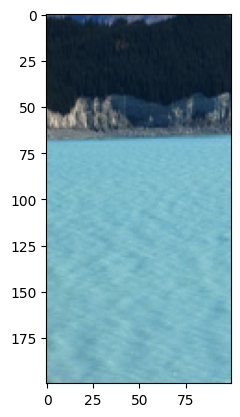

In [21]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Thay ƒë·ªïi k√≠ch th∆∞·ªõc h√¨nh n·ªÅn th√†nh c√πng k√≠ch th∆∞·ªõc v·ªõi h√¨nh ·∫£nh logo
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Thay ƒë·ªïi k√≠ch th∆∞·ªõc trong khi v·∫´n gi·ªØ nguy√™n t·ª∑ l·ªá khung h√¨nh

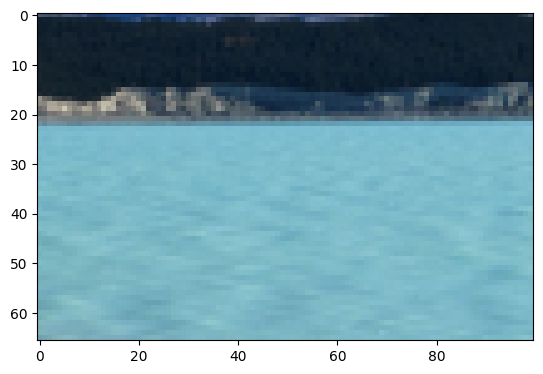

In [22]:
# Ph∆∞∆°ng ph√°p 2: S·ª≠ d·ª•ng 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Thay ƒë·ªïi k√≠ch th∆∞·ªõc h√¨nh ·∫£nh
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

### Ch√∫ng ta h√£y th·ª±c s·ª± hi·ªÉn th·ªã h√¨nh ·∫£nh ƒë√£ ƒë∆∞·ª£c thay ƒë·ªïi k√≠ch th∆∞·ªõc (ƒë√£ c·∫Øt)

In [23]:
# ƒê·ªïi th·ª© t·ª± k√™nh
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

# L∆∞u h√¨nh ·∫£nh ƒë√£ thay ƒë·ªïi k√≠ch th∆∞·ªõc v√†o ƒëƒ©a
cv2.imwrite("image/resized_cropped_region_2x.png", resized_cropped_region_2x)

# Hi·ªÉn th·ªã h√¨nh ·∫£nh ƒë√£ c·∫Øt v√† ƒë√£ thay ƒë·ªïi k√≠ch th∆∞·ªõc
Image(filename="resized_cropped_region_2x.png")

FileNotFoundError: [Errno 2] No such file or directory: 'resized_cropped_region_2x.png'

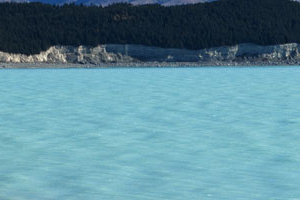

In [ ]:
# ƒê·ªïi th·ª© t·ª± k√™nh
cropped_region = cropped_region[:, :, ::-1]

# L∆∞u 'region' ƒë√£ c·∫Øt
cv2.imwrite("image/cropped_region.png", cropped_region)

# Hi·ªÉn th·ªã h√¨nh ·∫£nh ƒë√£ c·∫Øt v√† thay ƒë·ªïi k√≠ch th∆∞·ªõc
Image(filename="cropped_region.png")

## L·∫≠t h√¨nh ·∫£nh


H√†m **`flip`** l·∫≠t m·∫£ng theo m·ªôt trong ba c√°ch kh√°c nhau (ch·ªâ s·ªë h√†ng v√† c·ªôt d·ª±a tr√™n 0):

### C√∫ ph√°p h√†m
``` python
dst = cv.flip(src, flipCode )
```

`dst`: m·∫£ng ƒë·∫ßu ra c√≥ c√πng k√≠ch th∆∞·ªõc v√† ki·ªÉu v·ªõi src.

H√†m c√≥ **2 ƒë·ªëi s·ªë b·∫Øt bu·ªôc**:

1. `src`: h√¨nh ·∫£nh ƒë·∫ßu v√†o
2. `flipCode`: c·ªù ƒë·ªÉ ch·ªâ ƒë·ªãnh c√°ch l·∫≠t m·∫£ng; 0 c√≥ nghƒ©a l√† l·∫≠t quanh tr·ª•c x v√† gi√° tr·ªã d∆∞∆°ng (v√≠ d·ª•: 1) c√≥ nghƒ©a l√† l·∫≠t quanh tr·ª•c y. Gi√° tr·ªã √¢m (v√≠ d·ª•: -1) c√≥ nghƒ©a l√† l·∫≠t quanh c·∫£ hai tr·ª•c.

### T√†i li·ªáu OpenCV

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Li√™n k·∫øt t√†i li·ªáu</a>

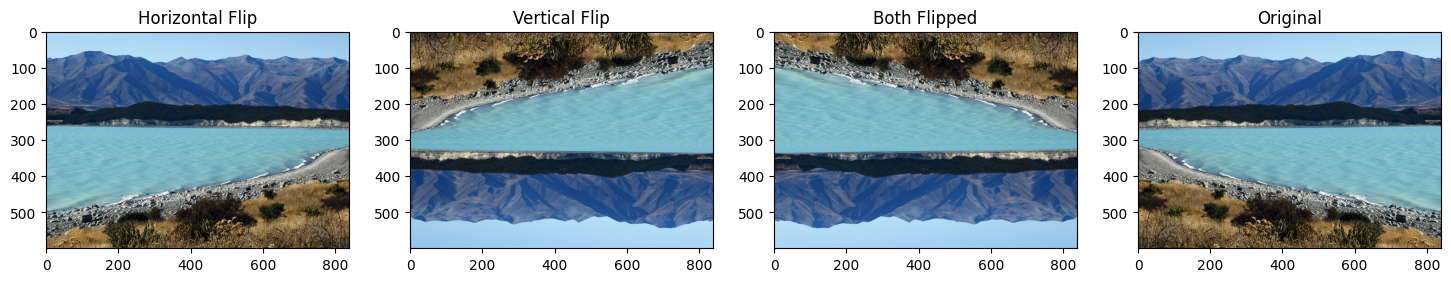

In [ ]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Hi·ªÉn th·ªã ·∫£nh
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");
